# Ride duration and the Ford Gobike user
## by Aniekoeno Nelson

## Investigation Overview


> I am especially interested in learning about identities/make up of the Ford GoBike users. In essense, who are their users? And if these identities determine certain variables like duration of ride.

## Dataset Overview

> The Ford GoBike dataset has 183,412 data entries spread across 16 columns. The different variables provide important information & details on:
> * __station__ (such as `start_station_id`,`start_station_name`,`start_station_latitude`,`start_station_longitude`,`end_station_id`,`end_station_name`,`end_station_latitude`,`end_station_longitude`); 
>* __time__(`duration_sec`,`start_time`,`end_time`); 
>* __users__(`user_type`,`member_birth_year`,`member_gender`); and 
>* __bikes__ (`bike_id`,`bike_share_for_all_trip`).

> In the end, 4 columns were dropped, and rows of data adjudged to be outliers were also dropped.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('fordgobike_tripdata.csv')

### Wrangling, tidying and transformations

In [3]:
#Permanently drop rows of dataset with null values.
gobike.dropna(axis=0, inplace=True)

In [4]:
#Drop columns that won't be used.
column_list = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
gobike.drop(column_list, axis=1, inplace=True)

In [5]:
gobike['member_age'] = 2019 - gobike['member_birth_year']
gobike[['member_age']] = gobike[['member_age']].astype('int64')

In [6]:
# use pandas' str.split() method split data on the conditions set in its arguments, into two new coulumns.
gobike[['start_date','start__time']] = gobike['start_time'].str.split(' ', expand=True)

In [7]:
# strip the start__time of the last five characters by splitting it on the "." character...
gobike[['new_start_time','seconds']] = gobike['start__time'].str.split('.', expand=True)

In [8]:
# convert the start_date column to datetime object for facilitate the application of certain methods and functions on it.
gobike.start_date = pd.to_datetime(gobike.start_date)

In [9]:
# use dt.day_name() method to extract days of the week
gobike['ride_days'] = gobike.start_date.dt.day_name()

In [10]:
# calculate duration in minutes
gobike['duration_min'] = gobike['duration_sec']/60

In [11]:
# set conditions for grouping data into different time periods
x = [
    gobike.start__time < '12:00:00',
    (gobike.start__time > '12:00:00') & (gobike.start__time < '17:00:00'),
   gobike.start__time > '17:00:00'    
]

y = ['morning','afternoon','evening']

gobike['time_of_day'] = np.select(x, y)

### The gender category labeled as "Others" has the lowest frequency of the given genders. The predominant gender are the males, while is about 1/3 of the total male counts.

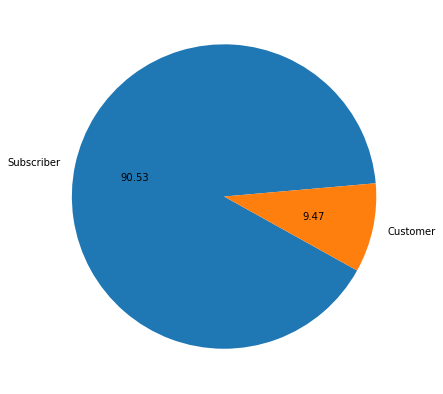

In [12]:
user_type_counts = gobike['user_type'].value_counts()
mplt.figure(figsize = [7, 7])
mplt.pie(user_type_counts, labels = user_type_counts.index, startangle = 5, autopct='%.2f');

### Members of different genders across the two user types have the bulk of their age distribution between 20 and 40year olds. Also, the youngest users are male customers of the unclassified gender.

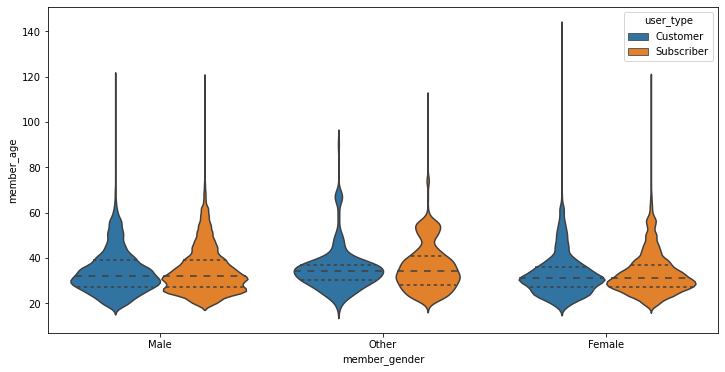

In [13]:
mplt.figure(figsize=[12, 6])
sb.violinplot(data=gobike, inner='quartile', x='member_gender', y='member_age', hue='user_type');

### Majority of the users keep bikes no longer than approximately 100 minutes (i.e about an hour and a half).


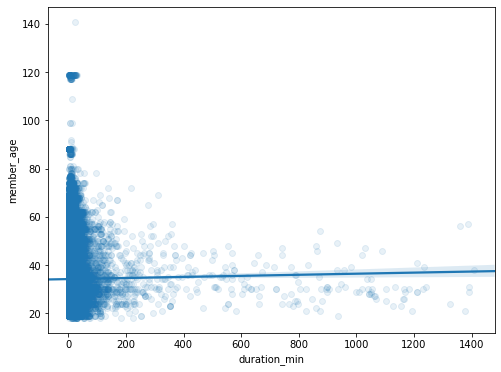

In [14]:
mplt.figure(figsize=[8,6])
sb.regplot(data = gobike, x='duration_min', y='member_age', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10});

### But, long durations are not exactly peculiar to just one gender, as all 3 gender labels seem suitably represented from the 400 minutes mark upwards. Also, majority of the users under 60 years of age. 

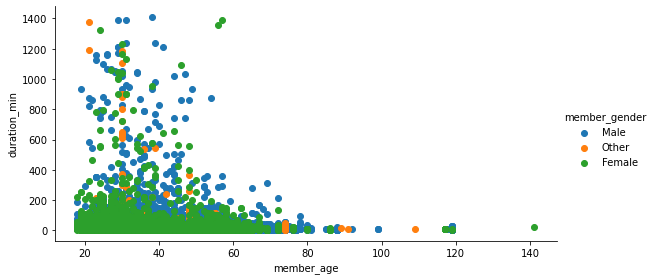

In [15]:
g = sb.FacetGrid(data = gobike, hue = 'member_gender', height=4, aspect=2);
g.map(mplt.scatter, 'member_age', 'duration_min')
g.add_legend()

### The gender labelled "Other" spend relatively more minutes on their trip compred to their Female and Male counterparts, every other day of the week. The females have the highest comparative ride duration of the other 2 gender groups.

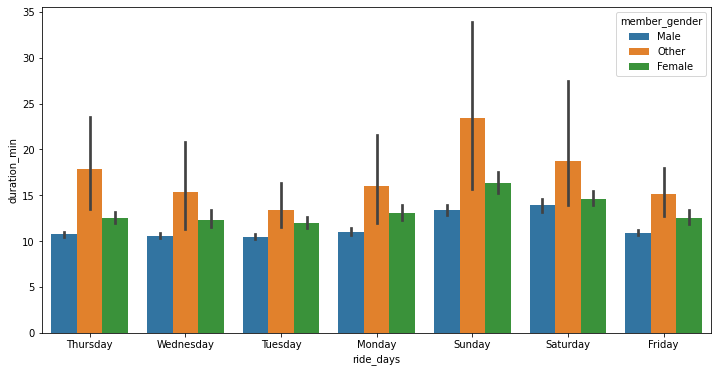

In [16]:
mplt.figure(figsize=[12, 6])
sb.barplot(x='ride_days', y='duration_min', data=gobike, hue='member_gender');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template-Copy1.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 